In [46]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [47]:
start = '2012-01-01'
end = '2022-12-21'
stock = "GOOG"

data = yf.download(stock, start, end)

C:\Users\MASTER\AppData\Local\Temp\ipykernel_16796\2000259769.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [48]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.460487,16.528268,16.137911,16.152013,147611217
2012-01-04,16.531481,16.580214,16.341993,16.451085,114989399
2012-01-05,16.302168,16.424865,16.233398,16.379349,131808205
2012-01-06,16.079781,16.326659,16.074090,16.305631,108119746
2012-01-09,15.398018,16.005074,15.367590,15.992703,233776981
...,...,...,...,...,...
2022-12-14,94.662201,96.559223,93.301517,94.890641,26452900
2022-12-15,90.580124,93.390891,89.815361,92.904223,28298800


In [49]:
ma_100_days = data.Close.rolling(100).mean()

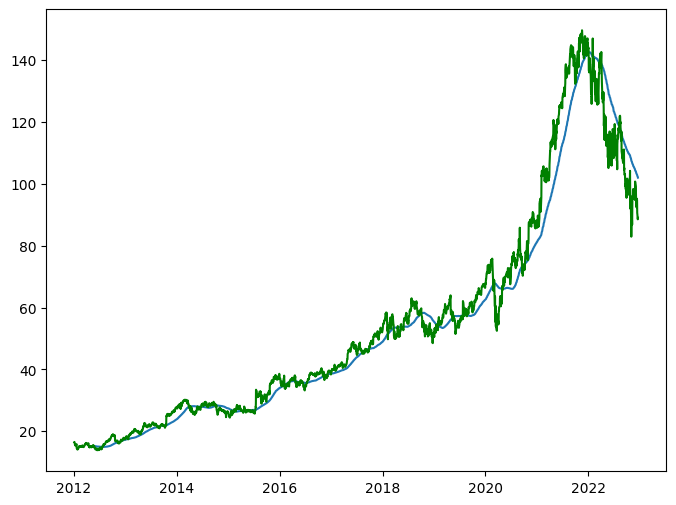

In [50]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days)
plt.plot(data.Close, 'g')
plt.show()

In [51]:
ma_200_days = data.Close.rolling(200).mean()

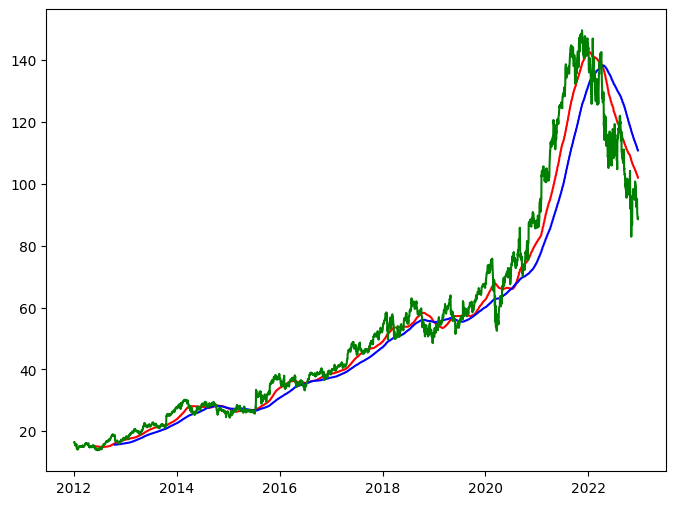

In [52]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [53]:
data.dropna(inplace=True)

In [54]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [55]:
data_train.shape[0]

2208

In [56]:
data_test.shape[0]

553

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [58]:
data_train_scale = scaler.fit_transform(data_train)

In [59]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [60]:
x, y = np.array(x), np.array(y)

In [61]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [62]:
model = Sequential()

# 1st LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

# 2nd LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# 3rd LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# 4th LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

c:\Users\MASTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - loss: 0.0388
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0081
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0063
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0054
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0048
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.0049
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.0048
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0042
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0039
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0041
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0037
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0041
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0036
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - l

In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [66]:
pas_100_days = data_train.tail(100)

In [67]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [68]:
data_test_scale = scaler.fit_transform(data_test)

In [69]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [70]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


In [71]:
scale = 1/scaler.scale_

In [72]:
y_predict = y_predict*scale

In [73]:
y = y*scale

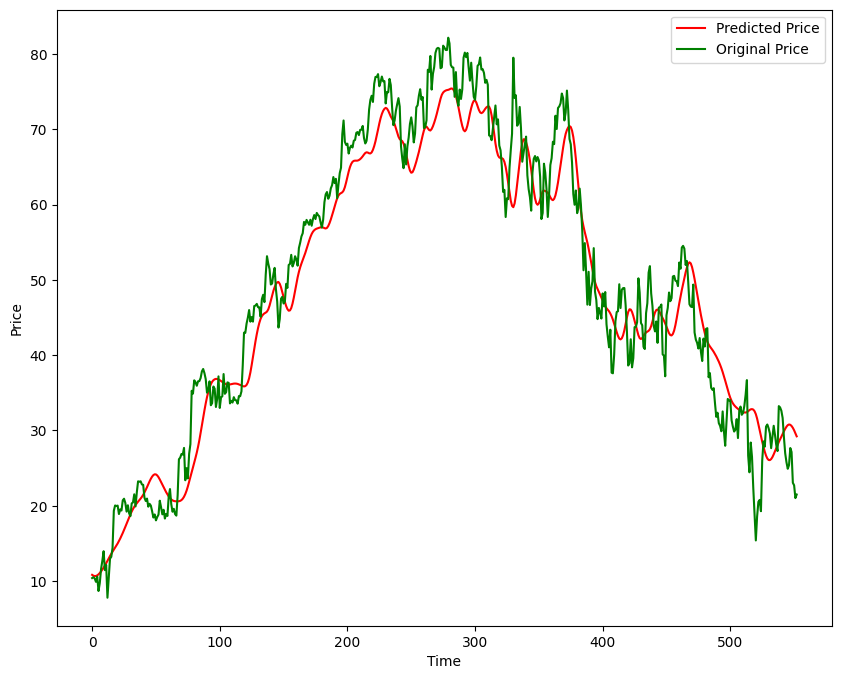

In [74]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [75]:
model.save('Stock_Predictions_Model.keras')